In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("dados_tratados.xlsx")

In [15]:
# 1. Total de vendas por loja - Agrupar por loja e somar o valor total vendido
total_vendas_loja = df.groupby('loja')['valor_venda'].sum()

print(f"Total de vendas pro loja:\n {total_vendas_loja}")

df_total_vendas_loja = pd.DataFrame(total_vendas_loja)

Total de vendas pro loja:
 loja
Chuva Clara    167110.14
Porto Sol      148059.25
Vento Norte    160780.08
Vila Neve      144611.09
Name: valor_venda, dtype: float64


<Figure size 1000x500 with 0 Axes>

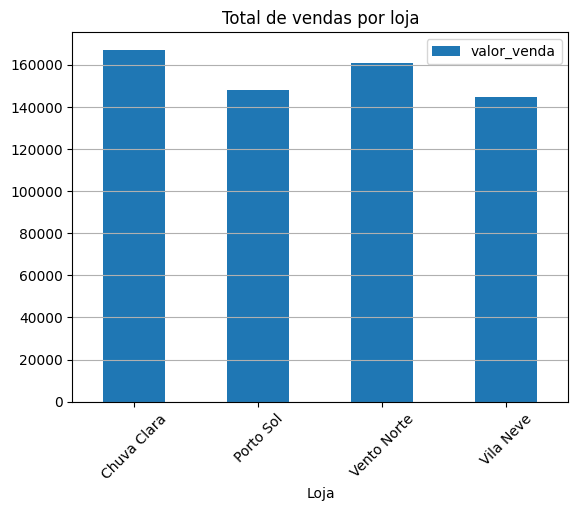

In [52]:
plt.figure(figsize=(10, 5))
df_total_vendas_loja.plot(kind='bar')

plt.title("Total de vendas por loja")
plt.xlabel("Loja")
plt.xticks(rotation=45)
plt.grid(axis='y')

In [16]:
# 2. Evolução mensal de vendas -  Identificar sazonalidades e picos mensais.
df['data'] = pd.to_datetime(df['data'])

df['mes_ano'] = df['data'].dt.to_period('M')

display(df)

,data,loja,categoria,produto,quantidade,valor_venda,valor_unitario,mes_ano
0,2024-07-20,Vento Norte,Eletrodomesticos,Aquecedor,5,405.55,81.11,2024-07
1,2024-05-30,Vento Norte,Sazonal,Guarda-Chuva,6,2866.20,477.70,2024-05
2,2024-01-25,Vento Norte,Roupas,Calça,8,3292.72,411.59,2024-01
3,2024-07-10,Chuva Clara,Roupas,Casaco,5,1294.95,258.99,2024-07
4,2024-08-31,Porto Sol,Sazonal,Manta Térmica,2,957.96,478.98,2024-08
...,...,...,...,...,...,...,...,...
415,2024-08-23,Porto Sol,Eletrodomesticos,Ventilador,4,1545.72,386.43,2024-08
416,2024-12-19,Vento Norte,Eletrodomesticos,Ventilador,1,230.89,230.89,2024-12
417,2024-05-12,Vila Neve,Infantil,Blusa Infantil,6,441.30,73.55,2024-05
418,2024-03-08,Vila Neve,Eletrodomesticos,Ar-Condicionado,1,293.93,293.93,2024-03


In [21]:
# 3. Agrupar por mês e somar vendas
df_evolucao_mensal = df.groupby('mes_ano')['valor_venda'].sum()
print(df_evolucao_mensal)


mes_ano
2024-01    60691.71
2024-02    44847.58
2024-03    66190.62
2024-04    43056.45
2024-05    48735.05
2024-06    56312.80
2024-07    52659.94
2024-08    47412.70
2024-09    57258.88
2024-10    48616.57
2024-11    53871.05
2024-12    40907.21
Freq: M, Name: valor_venda, dtype: float64


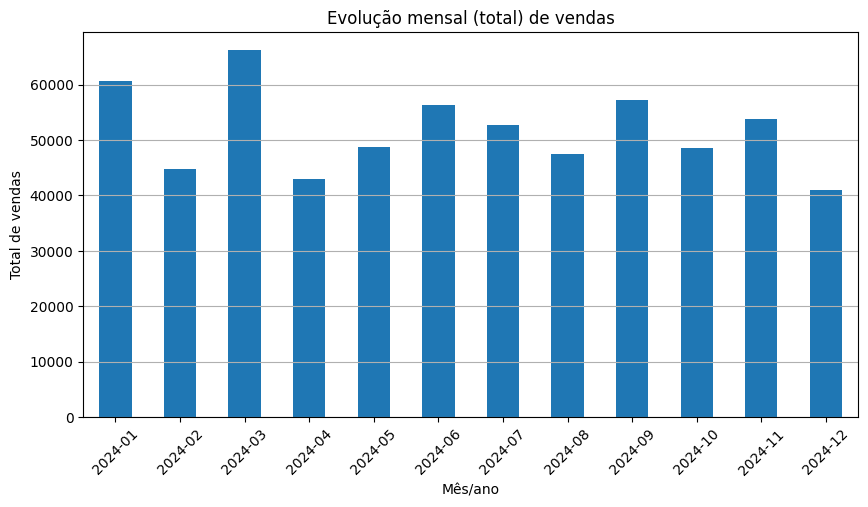

In [41]:
plt.figure(figsize=(10, 5))
df_evolucao_mensal.plot(kind='bar')

plt.title("Evolução mensal (total) de vendas")
plt.xlabel("Mês/ano")
plt.ylabel("Total de vendas")
plt.xticks(rotation=45)
plt.grid(axis='y')

In [20]:
# 4. Produtos mais vendidos (por volume) Objetivo: saber o que mais sai no caixa.
df_vendidos_por_volume = df.groupby('produto')['quantidade'].sum()

print(df_vendidos_por_volume)

produto
Aquecedor          181
Ar-Condicionado    143
Blusa Infantil     172
Calça              153
Camiseta           121
Casaco             145
Guarda-Chuva       239
Lancheira          174
Manta Térmica      180
Mochila            185
Protetor Solar     243
Ventilador         161
Vestido            141
Name: quantidade, dtype: int64

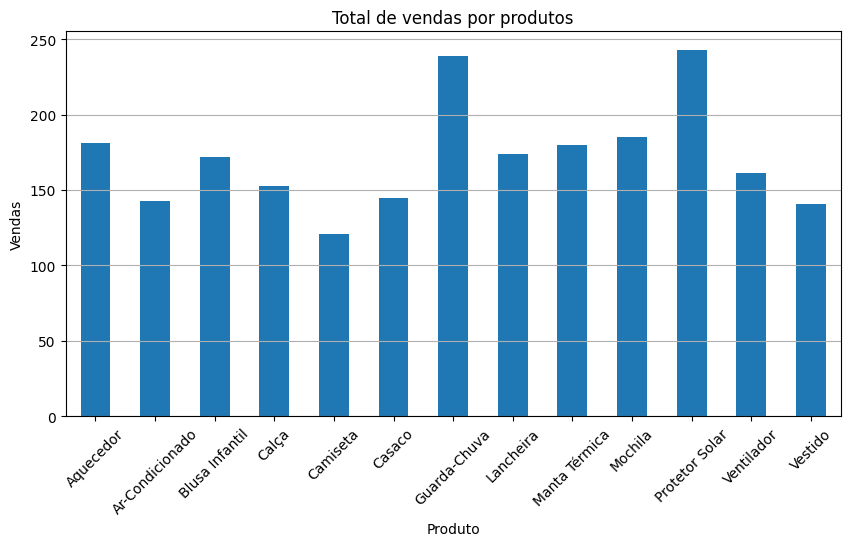

In [47]:
plt.figure(figsize=(10, 5))
df_vendidos_por_volume.plot(kind='bar')

plt.title("Total de vendas por produtos")
plt.xlabel("Produto")
plt.ylabel("Vendas")
plt.xticks(rotation=45)
plt.grid(axis='y')

In [23]:
# 5. Comparação entre categorias. Objetivo: analisar quais categorias são mais lucrativas.
df_comparacao_categorias_total_vendas = df.groupby('categoria')['valor_venda'].sum()

print(df_comparacao_categorias_total_vendas)

categoria
Eletrodomesticos    125584.66
Infantil            157641.01
Roupas              161911.43
Sazonal             175423.46
Name: valor_venda, dtype: float64


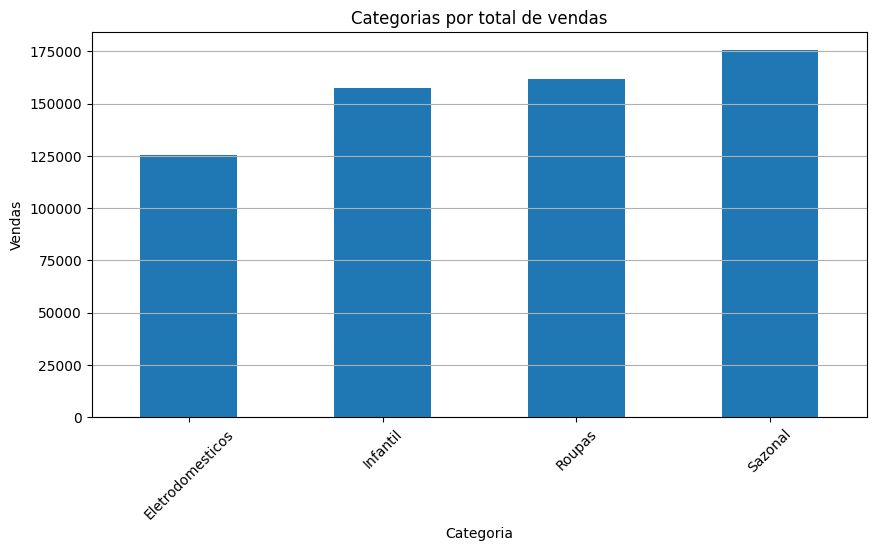

In [48]:
plt.figure(figsize=(10, 5))
df_comparacao_categorias_total_vendas.plot(kind='bar')

plt.title("Categorias por total de vendas")
plt.xlabel("Categoria")
plt.ylabel("Vendas")
plt.xticks(rotation=45)
plt.grid(axis='y')

In [27]:
# 6. Comparação entre lojas por categoria. Objetivo: avaliar se há especialização ou foco diferente entre as lojas, com base nas categorias que mais vendem.
df_comparacao_lojas_categoria = df.groupby(['loja', 'categoria']).size().unstack(fill_value=0)

print(df_comparacao_lojas_categoria)

categoria    Eletrodomesticos  Infantil  Roupas  Sazonal
loja                                                    
Chuva Clara                19        22      37       26
Porto Sol                  22        24      19       35
Vento Norte                28        31      28       27
Vila Neve                  22        32      20       28


<Figure size 1000x500 with 0 Axes>

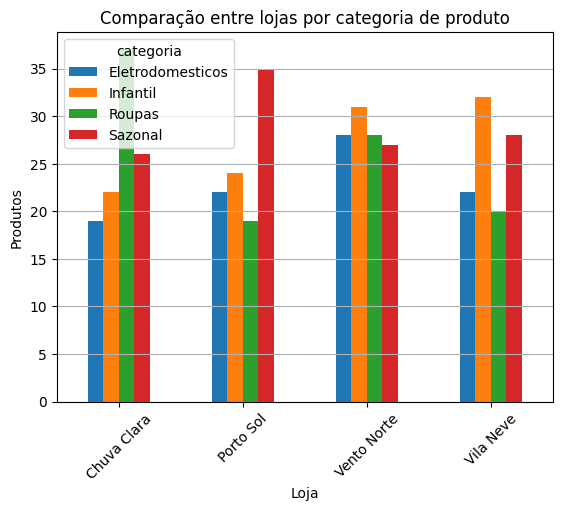

In [33]:
# 7. Plotar como gráfico de barras empilhadas
plt.figure(figsize=(10, 5))
df_comparacao_lojas_categoria.plot(kind='bar')

plt.title("Comparação entre lojas por categoria de produto")
plt.xlabel("Loja")
plt.ylabel("Produtos")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()